In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
out_dir = '/Users/tanshi/Desktop/SIP/'
execfile(out_dir+'plot_routines.py')

In [2]:
# UV_besancon = np.loadtxt(out_dir+'besancanCMDdata.txt', usecols=(0),unpack=True)
# print UV_besancon
# print len(UV_besancon)

# mv_besancon = np.loadtxt(out_dir+'besancanCMDdata.txt', usecols=(1),unpack=True)
# print mv_besancon
# print len(mv_besancon)

# distance_besancon = np.loadtxt(out_dir+'besancanCMDdata.txt', usecols=(2),unpack=True)
# print distance_besancon

In [3]:
Mv_6 = np.loadtxt('Table_Mass_0.6.txt',usecols=(3),unpack=True)
print(Mv_6)

[18.984 18.491 18.097 17.774 17.51  17.285 17.082 16.883 16.684 16.478
 16.257 16.012 15.742 15.462 15.178 14.909 14.658 14.222 13.865 13.557
 13.281 13.023 12.783 12.554 12.342 12.149 11.977 11.834 11.714 11.615
 11.544 11.476 11.406 11.336 11.27  11.207 11.148 11.09  11.036 10.982
 10.682 10.241  9.814  9.433  9.19   8.986  8.793  8.616  8.446  8.286
  8.126  7.968  7.795  7.589  7.388  7.183  6.951]


In [4]:
UB_6 = np.loadtxt('Table_Mass_0.6.txt', usecols=(4),unpack=True)
print(UB_6)

BV_6 = np.loadtxt('Table_Mass_0.6.txt', usecols=(5),unpack=True)
print(BV_6)

UV_6 = UB_6 + BV_6
print(UV_6)

[ 1.113  0.944  0.813  0.702  0.604  0.522  0.453  0.39   0.33   0.272
  0.211  0.146  0.075  0.    -0.076 -0.149 -0.216 -0.335 -0.439 -0.515
 -0.563 -0.591 -0.602 -0.603 -0.597 -0.588 -0.582 -0.582 -0.587 -0.591
 -0.596 -0.603 -0.616 -0.633 -0.652 -0.672 -0.694 -0.715 -0.736 -0.757
 -0.87  -1.005 -1.106 -1.166 -1.196 -1.213 -1.225 -1.234 -1.241 -1.247
 -1.253 -1.257 -1.261 -1.264 -1.268 -1.271 -1.274]
[ 1.418  1.423  1.384  1.336  1.285  1.234  1.189  1.143  1.099  1.052
  1.002  0.948  0.887  0.823  0.757  0.694  0.636  0.533  0.445  0.374
  0.322  0.283  0.255  0.236  0.224  0.215  0.207  0.197  0.187  0.177
  0.167  0.154  0.138  0.12   0.102  0.082  0.065  0.049  0.034  0.021
 -0.046 -0.127 -0.193 -0.237 -0.26  -0.275 -0.286 -0.294 -0.301 -0.306
 -0.312 -0.316 -0.32  -0.324 -0.327 -0.33  -0.333]
[ 2.531  2.367  2.197  2.038  1.889  1.756  1.642  1.533  1.429  1.324
  1.213  1.094  0.962  0.823  0.681  0.545  0.42   0.198  0.006 -0.141
 -0.241 -0.308 -0.347 -0.367 -0.373 -0.373 -0.

In [5]:
VR_6 = np.loadtxt('Table_Mass_0.6.txt',usecols=(6),unpack=True)
RI_6 = np.loadtxt('Table_Mass_0.6.txt',usecols=(8),unpack=True)
VI_6 = VR_6 + RI_6

In [6]:
def convert_to_AB_TM(V, VI, UB, BV):
    i_mag=V-VI
    c0i=25.496
    c1i=-0.014
    c2i=0.015
    F814_0=26.776
    F814=F814_0+i_mag -(c0i +c1i*VI+c2i*VI**2)

    F606_0=26.655
    c0v=26.331
    c1v=0.340
    c2v=-0.038
    F606=F606_0+V-(c0v+c1v*VI+c2v*VI**2)

    Mv=F606-0.169
    m_i=F814-0.84

    u_bes=UB+BV+V+0.79 #Johnson-Cousins (Vega? Converted to AB as in Blanton et al. 2007 Table 1)
    
    UV = u_bes - Mv
    
    return (Mv, UV)

Mv = (convert_to_AB_TM(Mv_6, VI_6, UB_6, BV_6)[0])
UV = (convert_to_AB_TM(Mv_6, VI_6, UB_6, BV_6)[1])

In [20]:
def convert_to_AB_BES(V, VI, UV):
    i_mag=V-VI
    c0i=25.496
    c1i=-0.014
    c2i=0.015
    F814_0=26.776
    F814=F814_0+i_mag -(c0i +c1i*VI+c2i*VI**2)

    F606_0=26.655
    c0v=26.331
    c1v=0.340
    c2v=-0.038
    F606=F606_0+V-(c0v+c1v*VI+c2v*VI**2)

    m_v=F606-0.169
    m_i=F814-0.84

    u_bes=UV+V+0.79 #Johnson-Cousins (Vega? Converted to AB as in Blanton et al. 2007 Table 1)
    
    UV_bes = u_bes - m_v
    return (m_v,UV_bes)

mv_besancon = (convert_to_AB_BES(V_besancon,VI_besancon,UV_besancon)[0])
UV_bes = (convert_to_AB_BES(V_besancon,VI_besancon,UV_besancon)[1])

In [21]:
besancon = np.genfromtxt(out_dir+'besancon_data.txt', \
                    usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12,13), \
                    names=['dist','Mv','Typ','logg','age','mass','U_V','V_I','I_J','J_H','V','mux','muy','Vr'])

V_besancon = besancon['V']
VI_besancon = besancon['V_I']
UV_besancon = besancon['U_V']
dist_besancon = besancon['dist']

Text(0,0.5,'mv')

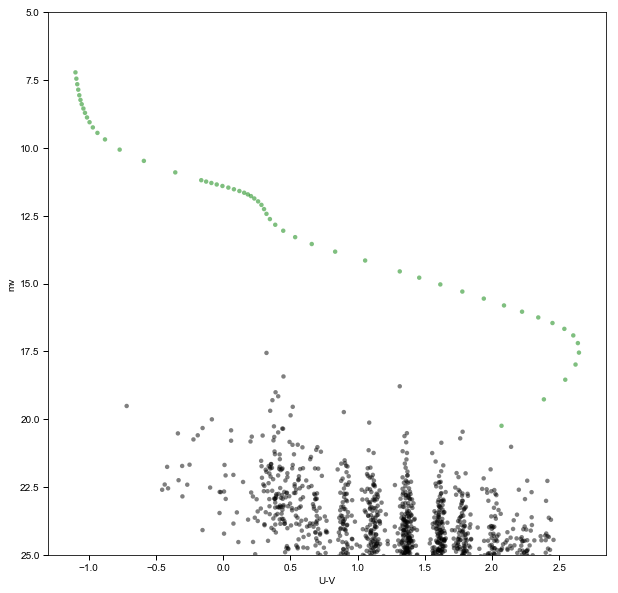

In [22]:
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_bes, mv_besancon, c='black',edgecolors='none',s=20,alpha=0.5)
plt.scatter(UV, Mv, c='green',edgecolors='none',s=20,alpha=0.5)
plt.ylim(25,5)
plt.xlabel('U-V')
plt.ylabel('mv')

In [23]:
Mv_wd = np.array([])
for j in range(len(UV_bes)):
    check = False
    for i in range(len(UV)):
        if (UV_bes[j] < UV[i]) and (UV_bes[j] > UV[i+1]):
            weight1 = ((UV[i] - UV_bes[j]) / (UV[i] - UV[i+1])) * 100
            weight2 = ((UV_bes[j] - UV[i+1]) / (UV[i] - UV[i+1])) * 100
            Mv_wd = np.append(Mv_wd, ((Mv[i]*weight2) + (Mv[i+1]*weight1)) / (weight1 + weight2))
            check = True
        elif (UV_bes[j] == UV[i]):
            Mv_wd = np.append(Mv_wd, Mv[i])
            check = True
            break
print(Mv_wd)
print(len(Mv_wd))
# for i in range(len(Mv_wd)):
#     print Mv_wd[i]

[14.55470506 15.89782577 15.30000009 15.76642183 12.43808236 13.06305633
 15.27117559 15.99643179 13.92253442 14.20127103 14.63961005 14.6108366
 15.04665939 16.38039644 16.07564972 12.84795741 13.24670965 14.6313314
 14.9386408  15.64044614 16.10484521 12.72907689 14.58904562 14.64019842
 14.97901084 15.06960269 15.22803332 15.3358908  15.55418168 16.16175987
 16.36131671 15.92311313 12.9202047  13.20388856 14.25215821 14.19458074
 14.63424133 14.61505903 15.04439546 15.25087364 15.59141986 15.65007862
 15.68694984 15.5358381  16.15108496 16.04012924 12.64141676 14.62465018
 15.01896262 15.21242782 15.59812372 15.70035756 15.71208931 15.93154362
 16.04915467 13.0543381  13.03217883 13.61539446 14.64906495 14.64267085
 14.6458679  15.02570582 14.97826516 14.98617194 15.03841104 15.01621769
 15.35946104 15.25288902 15.29776011 15.26730621 15.71418257 16.40106403
 16.43213305 15.61271532 16.02122186 13.33405384 13.65735543 13.60086951
 13.93135832 14.18412839 14.21525135 14.68902807 14.6

In [24]:
# Using distance modulus equation to solve for D in pc given mv and Mv
# Distance Modulus: mv - Mv = 5logD - 5
print len(mv_besancon)
print len(Mv_wd)
distance_wd_kpc = np.array([])
for i in range(len(mv_besancon)):
    distance_wd_kpc = np.append(distance_wd_kpc, (10 ** (((mv_besancon[i] - Mv_wd[i]) + 5) / 5)/1000))
print np.max(distance_wd_kpc)
print(distance_besancon)

994
994
6.394412329206867


NameError: name 'distance_besancon' is not defined

In [25]:
percent_error = np.array([])
for i in range (len(dist_besancon)):
    percent_error = np.append(percent_error, abs(distance_wd_kpc[i] - dist_besancon[i])/dist_besancon[i]*100)
print
print np.mean(abs(distance_wd_kpc - dist_besancon)/dist_besancon*100)
print percent_error
print np.max(percent_error)


6.208412682644546
[1.33538312e+00 4.82309826e+01 3.27718370e+00 2.13474540e+02
 1.94824233e+01 1.00023690e+01 7.07376768e+00 5.88155887e+01
 6.99566044e+00 2.18483059e+00 4.43671639e+00 1.77608806e+00
 6.79926438e+00 3.75403374e+00 5.07467122e+01 8.51370358e+00
 2.61783539e+00 6.11542732e+00 2.16911800e+00 6.66583169e+00
 8.69634911e+00 4.83816844e+00 4.10384741e+00 3.49037607e+00
 4.55451212e+00 2.31294130e+00 3.50722896e+00 1.09934093e+00
 2.57888994e+00 6.96028326e+00 1.68167361e+00 9.36127493e+01
 2.83902777e+01 1.32170709e+01 1.26937263e+00 6.89855557e-01
 5.19614283e+00 2.57994629e+00 4.16055978e+00 3.69038997e+00
 1.12866393e+00 1.79876688e+00 1.92275161e+00 3.10978958e+00
 5.74491797e+01 9.89736693e+01 7.25826126e+00 2.32795915e+00
 6.14511928e+00 4.18011072e+00 4.68537953e+00 7.33563486e+00
 5.81832626e+00 3.03791993e+01 7.53018182e+01 6.22324350e+00
 5.52278972e+00 1.05030951e+00 1.09453199e+00 1.15264861e-01
 6.91928464e+00 5.93175539e+00 1.93112995e+00 2.22328100e+00
 7.50

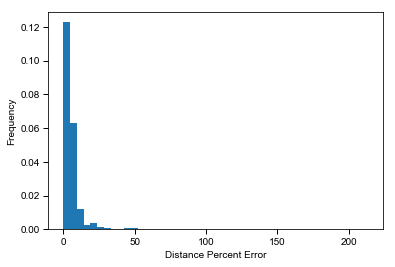

In [26]:
plt.hist(percent_error,45,histtype='stepfilled',density=True)
plt.xlabel('Distance Percent Error')
plt.ylabel('Frequency')
plt.savefig(out_dir+'error_besancon_dist.jpg',dpi=300)